In [1]:
#importing all libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#read the csv file
crimes = pd.read_csv("london_crime_by_lsoa.csv")

In [2]:
crimes.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
crimes.shape #how many rows/columns

(13490604, 7)

In [4]:
crimes.info() #data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [5]:
crimes.isnull().sum() #checking for null values in columns

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [6]:
crimes.nunique() #unique values per column

lsoa_code         4835
borough             33
major_category       9
minor_category      32
value              247
year                 9
month               12
dtype: int64

In [7]:
crimes['value'].value_counts() #count for how many times a crime was committed, min to max

0      10071505
1       2141789
2        712478
3        275501
4        119483
         ...   
216           1
151           1
243           1
188           1
218           1
Name: value, Length: 247, dtype: int64

In [8]:
crimes.groupby(['major_category'])['value'].sum().reset_index() #offences per major category of crime

,major_category,value
0,Burglary,754293
1,Criminal Damage,630938
2,Drugs,470765
3,Fraud or Forgery,5325
4,Other Notifiable Offences,106349
5,Robbery,258873
6,Sexual Offences,1273
7,Theft and Handling,2661861
8,Violence Against the Person,1558081


In [9]:
crimes.groupby(['borough','major_category',])['value'].sum().reset_index()

,borough,major_category,value
0,Barking and Dagenham,Burglary,18103
1,Barking and Dagenham,Criminal Damage,18888
2,Barking and Dagenham,Drugs,9188
3,Barking and Dagenham,Fraud or Forgery,205
4,Barking and Dagenham,Other Notifiable Offences,2819
...,...,...,...
290,Westminster,Other Notifiable Offences,6148
291,Westminster,Robbery,15752
292,Westminster,Sexual Offences,59
293,Westminster,Theft and Handling,277617


In [10]:
crimes.groupby(['borough', 'major_category', 'year', 'value']).size()

borough               major_category               year  value
Barking and Dagenham  Burglary                     2008  0        1542
                                                         1         676
                                                         2         280
                                                         3          79
                                                         4          42
                                                                  ... 
Westminster           Violence Against the Person  2016  33          2
                                                         34          2
                                                         35          2
                                                         37          1
                                                         43          1
Length: 29821, dtype: int64

In [11]:
crimes.drop(['lsoa_code','minor_category'], axis = 1, inplace = True) #remove lsoa_code and minor_gategory columns
crimes 

,borough,major_category,value,year,month
0,Croydon,Burglary,0,2016,11
1,Greenwich,Violence Against the Person,0,2016,11
2,Bromley,Violence Against the Person,0,2015,5
3,Redbridge,Burglary,0,2016,3
4,Wandsworth,Robbery,0,2008,6
...,...,...,...,...,...
13490599,Brent,Criminal Damage,0,2015,2
13490600,Hillingdon,Robbery,1,2015,6
13490601,Sutton,Burglary,0,2011,2
13490602,Croydon,Robbery,0,2011,5


In [12]:
import calendar

#change all month numbers in month column to 3 letter abbreviation
crimes['month'] = crimes['month'].apply(lambda x: calendar.month_abbr[x])

crimes

,borough,major_category,value,year,month
0,Croydon,Burglary,0,2016,Nov
1,Greenwich,Violence Against the Person,0,2016,Nov
2,Bromley,Violence Against the Person,0,2015,May
3,Redbridge,Burglary,0,2016,Mar
4,Wandsworth,Robbery,0,2008,Jun
...,...,...,...,...,...
13490599,Brent,Criminal Damage,0,2015,Feb
13490600,Hillingdon,Robbery,1,2015,Jun
13490601,Sutton,Burglary,0,2011,Feb
13490602,Croydon,Robbery,0,2011,May


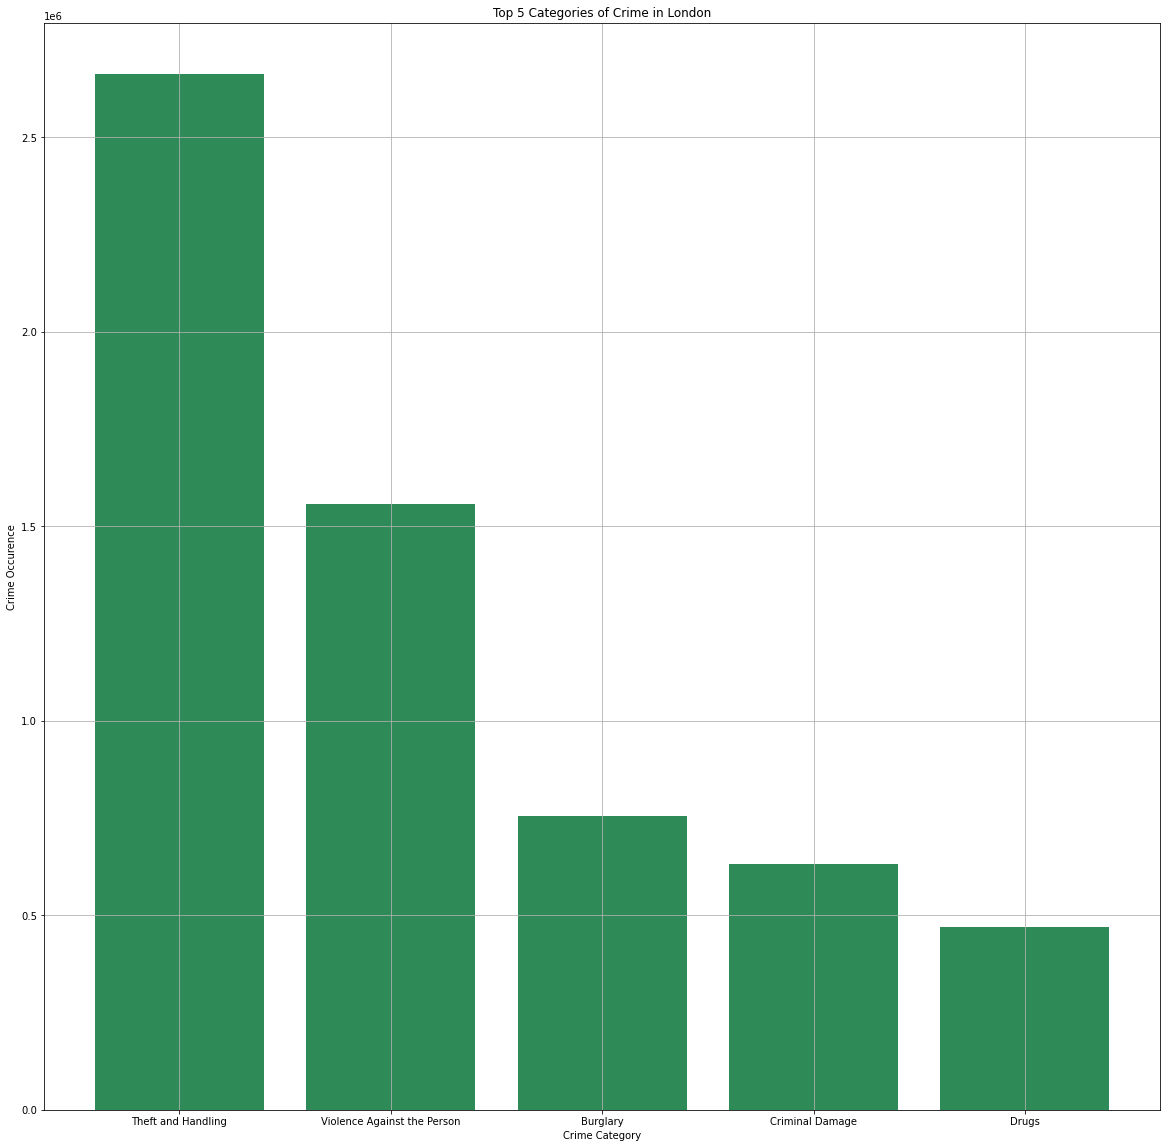

In [13]:
crime_graph=crimes.groupby('major_category')['value'].agg([sum]).sort_values(by=('sum'),ascending=False).reset_index().head(5)

fig1, ax1 = plt.subplots(figsize=(20, 20))
plt.grid()
ax1.set_facecolor('white')
ax1.bar(crime_graph['major_category'],crime_graph['sum'],color='seagreen')
plt.title('Top 5 Categories of Crime in London')
plt.xlabel("Crime Category")
plt.ylabel("Crime Occurence")
plt.show()

In [14]:
most_crime_borough = crimes['borough'].value_counts().reset_index().head(len(crimes['borough']))
print(most_crime_borough)

                     index  borough
0                  Croydon   602100
1                   Barnet   572832
2                   Ealing   549396
3                  Bromley   523908
4                  Lambeth   519048
5                  Enfield   511164
6               Wandsworth   498636
7                    Brent   490644
8                 Lewisham   485136
9                Southwark   483300
10                  Newham   471420
11               Redbridge   445716
12              Hillingdon   442584
13               Greenwich   421200
14                 Hackney   417744
15                Haringey   413856
16           Tower Hamlets   412128
17          Waltham Forest   406296
18                Havering   399600
19                Hounslow   395928
20                  Bexley   385668
21                  Camden   378432
22             Westminster   366660
23                  Harrow   365688
24               Islington   359208
25                  Merton   339876
26  Hammersmith and Fulham  

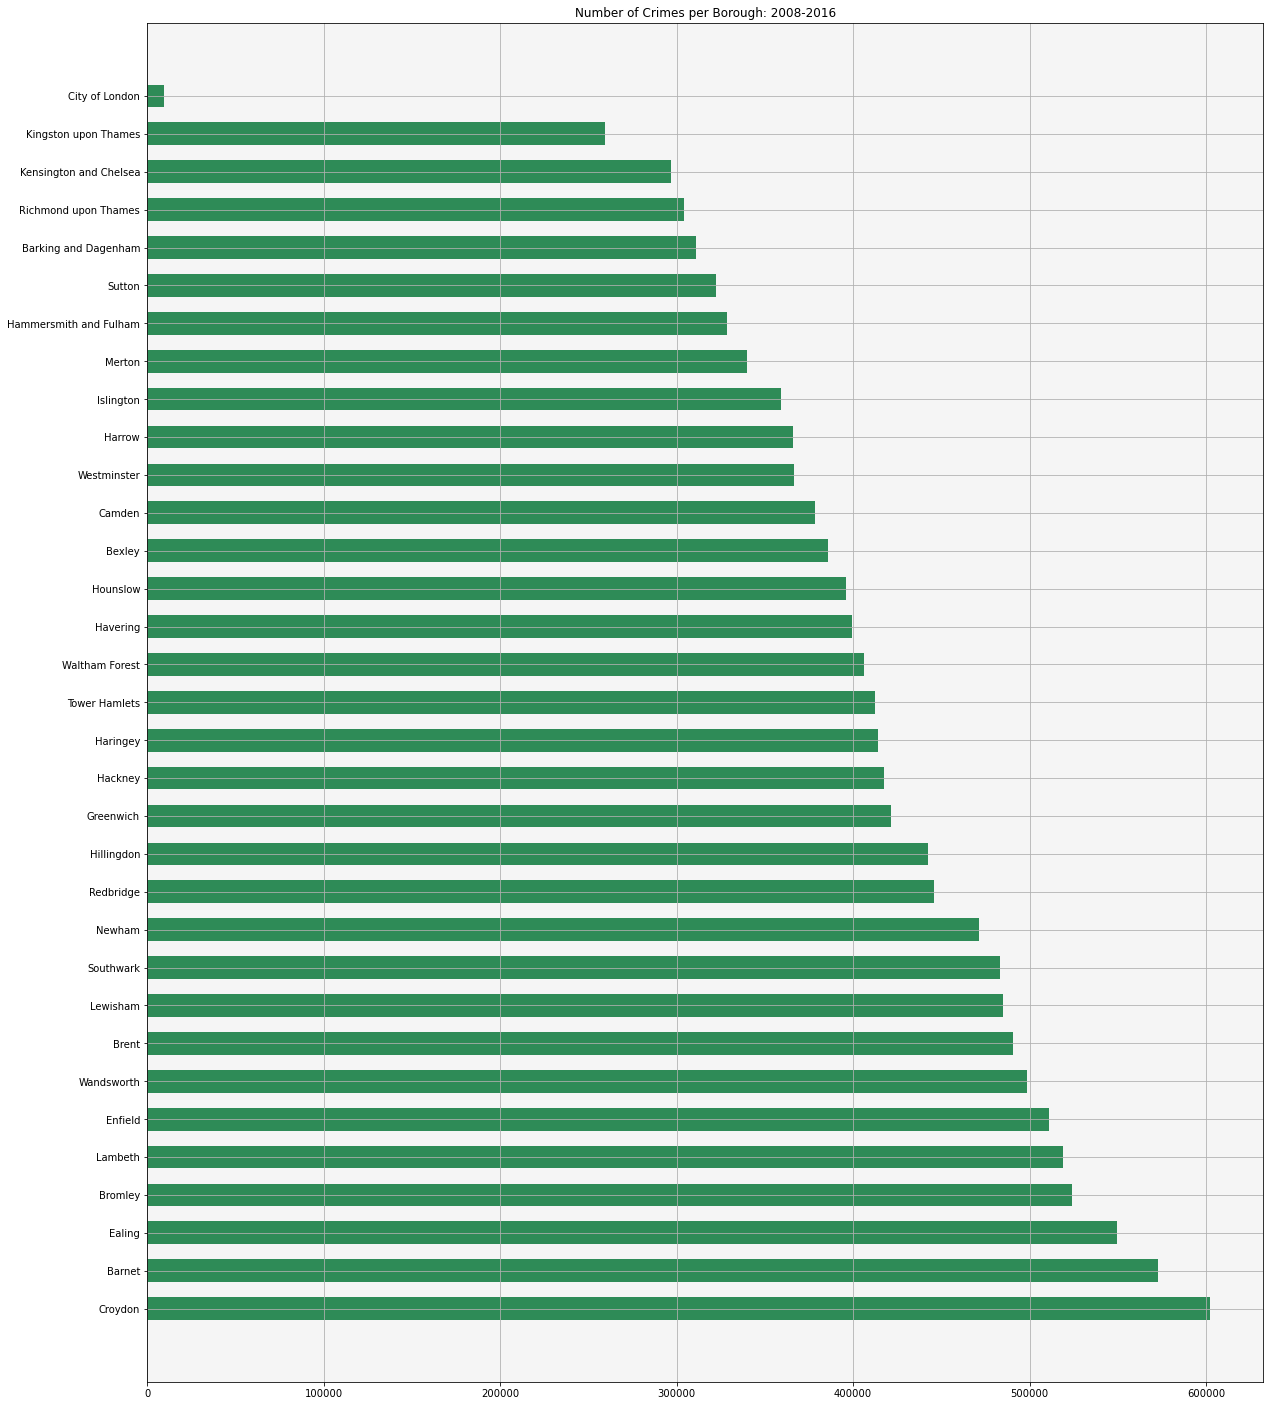

In [15]:
fig1, ax1 = plt.subplots(figsize=(20, 25))
plt.grid()
ax1.set_facecolor('whitesmoke')
ax1.barh(most_crime_borough['index'], most_crime_borough['borough'], color='seagreen', height = 0.6)
plt.title('Number of Crimes per Borough: 2008-2016')
plt.show()

In [16]:
most_crime_month =crimes.groupby('month')['value'].agg([sum]).sort_values(by=('sum'),ascending=False).reset_index().head(12)
print(most_crime_month)

   month     sum
0    Jul  563076
1    Oct  558252
2    May  552704
3    Mar  551795
4    Nov  549671
5    Jun  549041
6    Aug  532784
7    Jan  530247
8    Sep  522377
9    Apr  520648
10   Dec  516626
11   Feb  500537


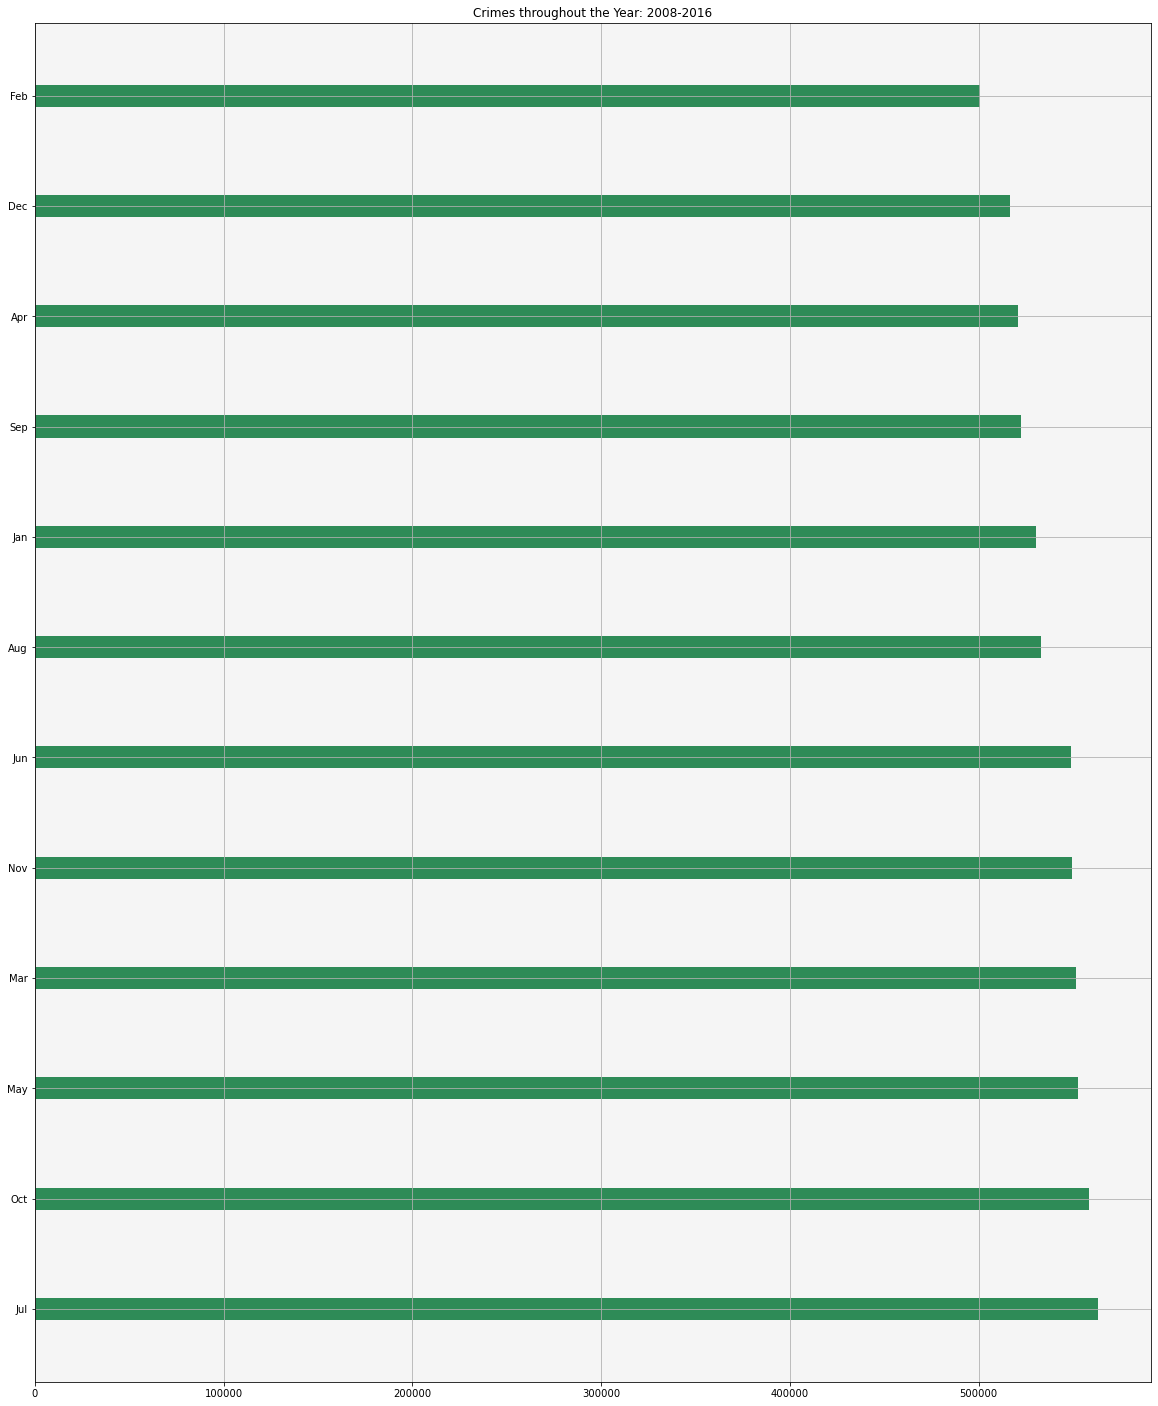

In [17]:
fig1, ax1 = plt.subplots(figsize=(20, 25))
ax1.set_facecolor('whitesmoke')
ax1.barh(most_crime_month['month'], most_crime_month['sum'], color='seagreen', height = 0.2)
plt.grid()
plt.title('Crimes throughout the Year: 2008-2016')
plt.show()

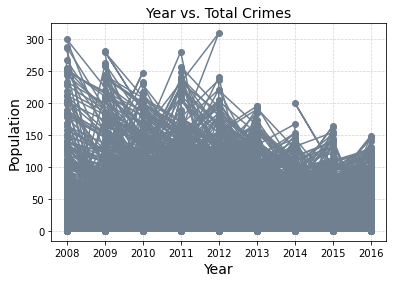

In [18]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

df = pd.DataFrame(crimes,columns=['year','value'])

plt.plot(df['year'], df['value'], color='slategrey', marker='o')
plt.title('Year vs. Total Crimes', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.7)
plt.show()

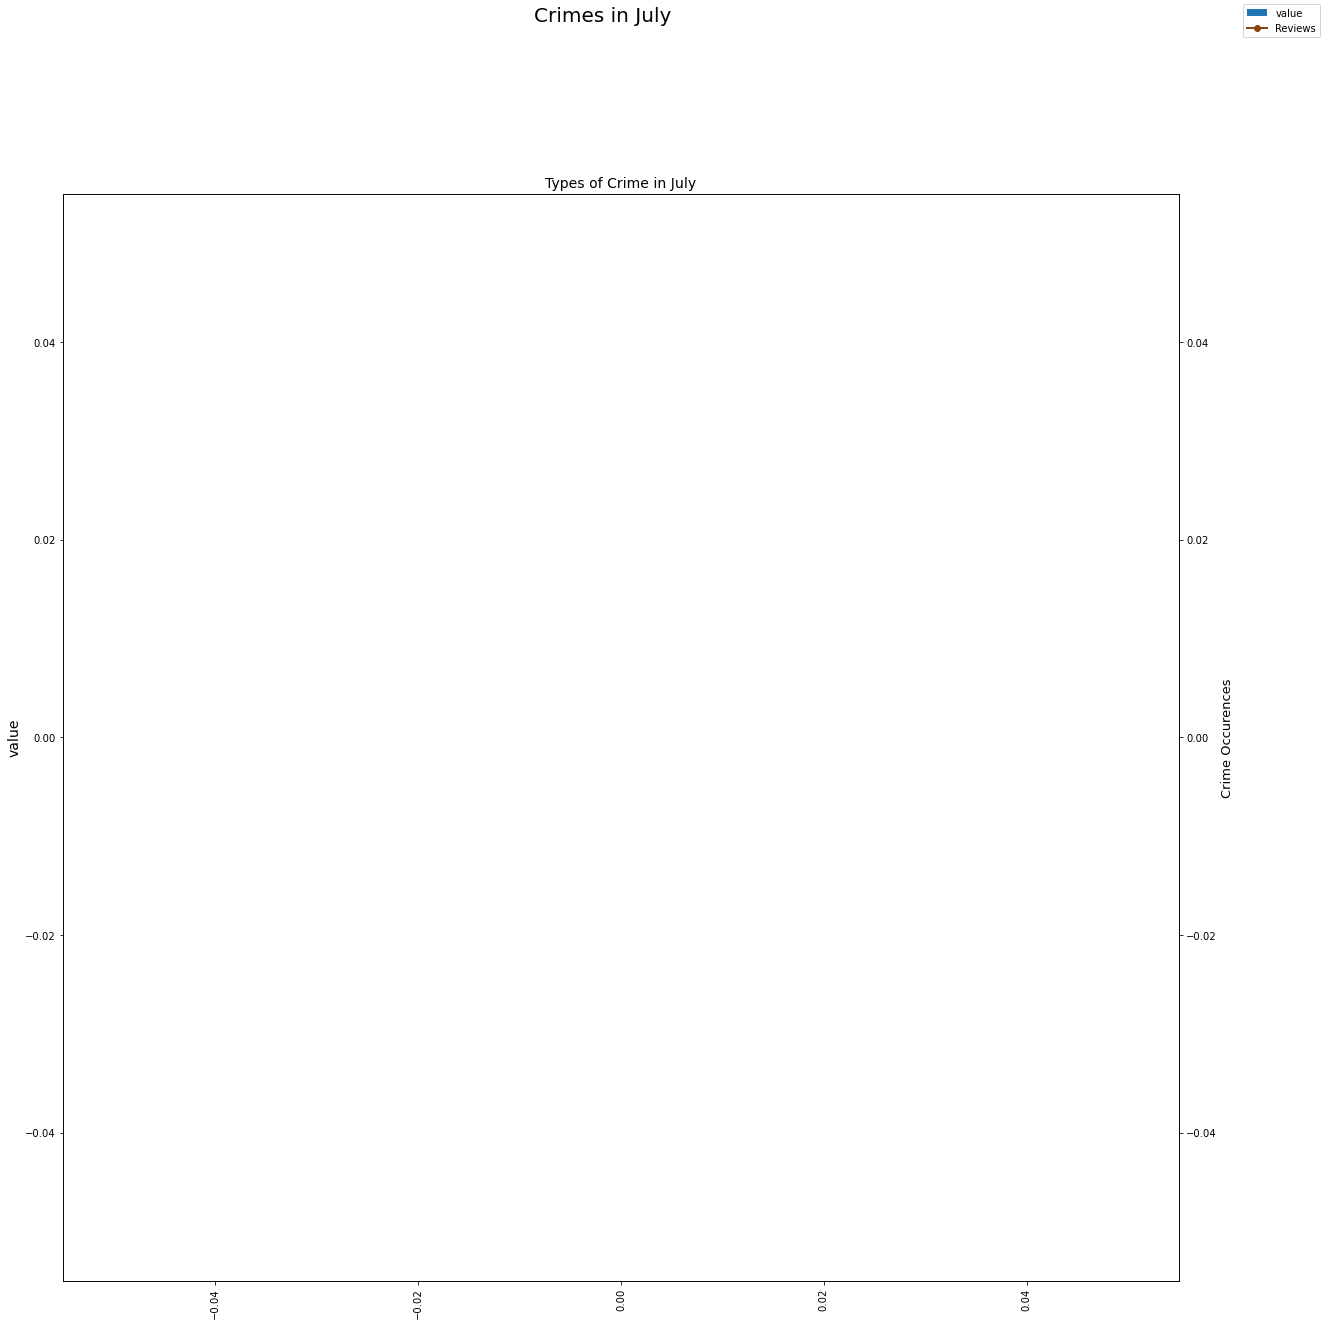

In [19]:
my_month = crimes[crimes["month"].isin(["July"]) ]
my_month = my_month.sort_values(by="year")

fig, ax1 = plt.subplots(figsize=(20, 20))
ax1.set_facecolor('white')
ax2 = ax1.twinx()
ax1.bar(my_month["major_category"],my_month["value"], color = "darkorange", label ="value" )
ax1.set_ylabel("value", fontsize =14)
ax1.tick_params(axis='x', labelrotation = 90)

ax2.plot(my_month["major_category"],my_month["value"],color = "saddlebrown",marker ="o",lw =2, label = "Reviews")
ax2.set_ylabel("Crime Occurences", fontsize =13)

plt.suptitle("Crimes in July", fontsize =20,y =1.01)
plt.title("Types of Crime in July", fontsize =14)
fig.legend(loc="upper right")